<a href="https://colab.research.google.com/github/ekqlsrla/TextBook/blob/main/HandsOn_MachineLearning/Chapter06_%EA%B2%B0%EC%A0%95%ED%8A%B8%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chapter 6**
---
---


## 6.1 결정 트리 학습과 시각화

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
iris = load_iris()
X = iris.data[:,2:]
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth = 2)
tree_clf.fit(X,y)

DecisionTreeClassifier(max_depth=2)

---
## 6.2 예측하기

* 불순도 측정
  * 지니 불순도 $G_i = 1 - \sum_{k = 1}^{n} p_{i,k}^2$


---
# 6.3 클래스 확률 추정

* 결정 트리는 한 샘플이 **특정 클래스 k**에 속할 확률을 추정할 수도 있음 => 이 샘플에 대해 리프 노드를 찾기 위해 트리를 탐색하고 그 노드에 있는 클래스 k의 훈련 샘플의 비율을 반환

In [3]:
tree_clf.predict_proba([[5,1.5]])
tree_clf.predict([[5,1.5]])

array([1])

---
## 6.4 CART 훈련 알고리즘

1. 훈련 세트를 하나의 특성 $k$의 임곗값 $t_k$를 사용해 두 개의 서브셋으로 나눔
  * 가장 순수한 서브셋으로 나눌 수 있는 ($k,t_k$) 짝을 찾는다

2. CART 알고리즘이 훈련 세트를 성공적으로 둘로 나누었다면 같은 방식으로 서브셋을 또 나누고 그 다음엔 서브셋의 서브셋을 나누고 반복

3. 최대 깊이가 되면 불순도를 줄이는 분할을 찾을 수 없을 때 멈추게 됨

---
## 6.5 계산 복잡도

* 예측을 하려면 결정 트리를 **루트 노드**에서부터 **리프 노드**까지 탐색해야 함. 결정 트리는 거의 균형을 이루고 있으므로 결정 트리를 탐색하기 위해서는 약 $O(log_2(m))$개의 노드를 거쳐야 함.각 도느는 하나의 특성값만 확인하기 때문에 예측에 필요한 전체 복잡도는 특성 수와 무관함

* 훈련 알고리즘은 각 노드에서 모든 훈련 샘플의 모든 특성을 비교. 각 노드에서 모든 특성을 비교하면 훈련 복잡도는 $O(n\times mlog(m))$이 됨

---
## 6.6 지니 불순도 또는 엔트로피

* 기본적으로 지니 불순도가 사용되지만 `criterion` 매개변수를 `"entropy"`로 지정하여 **엔트로피 불순도**를 사용할 수 있음

* 어떤 세트가 한 클래스의 샘플만 담고 있다면 엔트로피가 0

* 지니 불순도와 엔트로피는 실제로는 큰 차이가 없음. 지니 불순도가 조금 더 계산이 빠르기 때문에 기본값으로 좋음. 다른 트리가 만들어지는 경우 지니 불순도가 가장 빈도 높은 클래스를 한쪽 가지로 고립시키는 경향이 있는 반면 엔트로피는 조금 더 균형 잡힌 트리를 만듦

---
## 6.7 규제 매개변수

* 결정 트리는 훈련 데이터에 대한 제약 사항이 거의 없음. 제한을 두지 않으면 트리가 훈련 데이터에 아주 가깝게 맞추려고 해서 대부분 과대적합되기 쉬움

* 결정 트리는 모델 파라미터가 전혀 없는 것이 아니라 훈련되기 전에 파라미터 수가 결정되지 않기 때문에 이런 모델을 **비파라미터 모델**이라고 부름

* 반대로 선형 모델 같은 **파라미터 모델**은 미리 정의된 모델 파라미터 수를 가지므로 자유도가 제한되고 과대적합될 위험이 줄어듦.

* 훈련 데이터에 대한 과대적합을 피하기 위해 학습할 때 결정 트리의 자유도를 제한할 필요가 있음 : **규제**
  * 사이킷런에서는 `max_depth` 매개변수로 조절

* `DecisionTreeClassifier`에는 비슷하게 결정 트리의 형태를 제한하는 매개 변수가 있음
  1. `min_samples_split` : 분할되기 위해 노드가 가져야 하는 최소 샘플 수
  2. `min_samples_leaf` : 리프 노드가 가지고 있어야 할 최소 샘플 수
  3. `min_weight_fraction_leaf` : min_samples_split와 같지만, 가중치가 부여된 전체 샘플 수에서의 비율
  4. `max_leaf_nodes` : 리프 노드의 최대 수
  5. `max_features` : 각 노드에서 분할에 사용할 특성의 최대 수

**=> min으로 시작하는 매개변수를 증가시키거나 max로 시작하는 매개변수를 감소시키면 모델에 규제가 커짐**
  

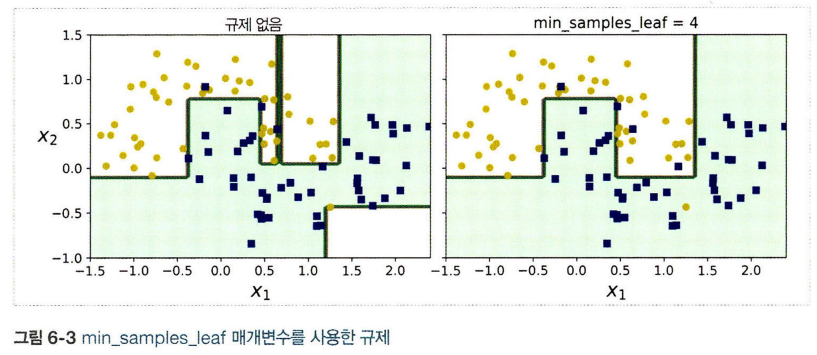

* *왼쪽 결정 트리* 는 기본 매개변수를 사용하여 훈련 시김
* *오른쪽 결정 트리* 는 `min_samples_leaf = 4`로 지정하여 훈련시킴

* 왼쪽 모델은 확실히 과대적합되었고, 오른쪽 모델은 일반화 성능이 더 좋을 것 같아 보임

---

## 6.8 회귀



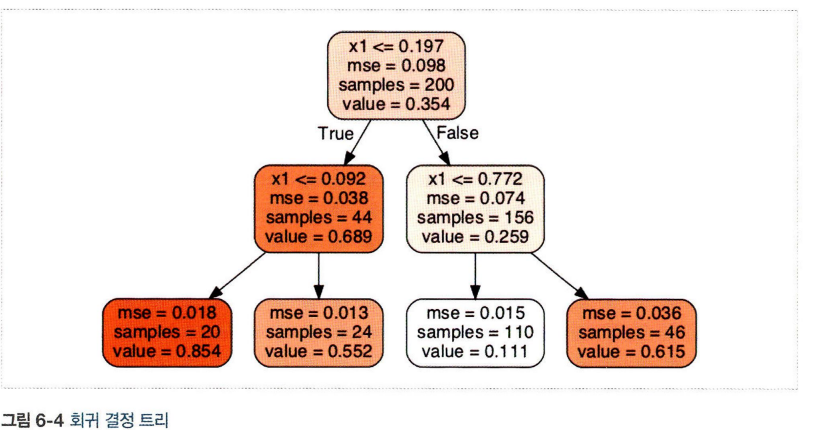

---
## 6.9 불안정성

* 결정 트리는 이해하고 해석하기 쉬우며 성능도 뛰어남, 그러나 계단 모양의 결정 경계를 만들기에 훈련 세트의 회전에 민감함

* 훈련 데이터를 더 좋은 방향으로 회전시키는 **PCA 기법**을 사용한다면 문제를 해결할 수 있